# MA934  Numerical Methods - Workbook 2

In [1]:
using PyPlot
using Distributions
include("kvpair.jl")
include("llist.jl")
include("ftree.jl");

In [2]:
include("functions2.jl");

## Question 1: Linear search using a linked list

**1.1)** Write a recursive function that traverses the list and prints out the key-value pairs stored in it. Check that your function works.

In [3]:
# Creating an LList

x=rand(5);

values=Array{KVPair}(5)
for i=1:5
    values[i]=KVPair(i,x[i])
end

L=Nullable{LList}()
L=buildLList(values)

println("L is an LLIst:\n\n",L)

L is an LLIst:

Nullable{LList}(LList(KVPair(1,0.182008),LList(KVPair(2,0.631108),LList(KVPair(3,0.324736),LList(KVPair(4,0.271793),LList(KVPair(5,0.838696),#NULL))))))


In [4]:
# Confirming that the traverse function works and prints out the key-value pairs of a list
traverse(L) 

1 0.18200780129531413
2 0.6311084752412539
3 0.3247364545687157
4 0.271793140196527
5 0.8386964802782211


**1.2)** Write a function search(list::Nullable{LList}, k::Int64) that searches an LList for the key k and returns the corresponding KVPair if it is present and a Nullable{KVPair} otherwise. Verify that your function works.

In [5]:
print("The corresponding KVPair for key 5 in LList L is: ", Lsearch(L,5),".\n\n")
print("The corresponding KVPair for key 10 in LList L is: ", Lsearch(L,10),". It is a Nullable{KVPair} as key 10 is not present in L.")

The corresponding KVPair for key 5 in LList L is: 0.8386964802782211.

The corresponding KVPair for key 10 in LList L is: Nullable{KVPair}. It is a Nullable{KVPair} as key 10 is not present in L.

**1.3)** Use Julia's @timed macro to measure how the typical computational cost of your search() function grows with the length of the list. 

In [63]:
# Loop creates llists of size n=2^i for i=1:15 and then searches for a key that returns a Nullable{KVPair}.
# The search times are stored in the time_actual array.

time_lsearch=zeros(15)

for i=1:15
    n=2^i
    srand(1234)
    x=rand(n)
    values=Array{KVPair}(n)
    for j=1:n
        values[j]=KVPair(j,x[j])
    end
    L=Nullable{LList}()
    L=buildLList(values)
    k=n+1
    t=@timed Lsearch(L,k)
    time_lsearch[i]=t[2]
end
;

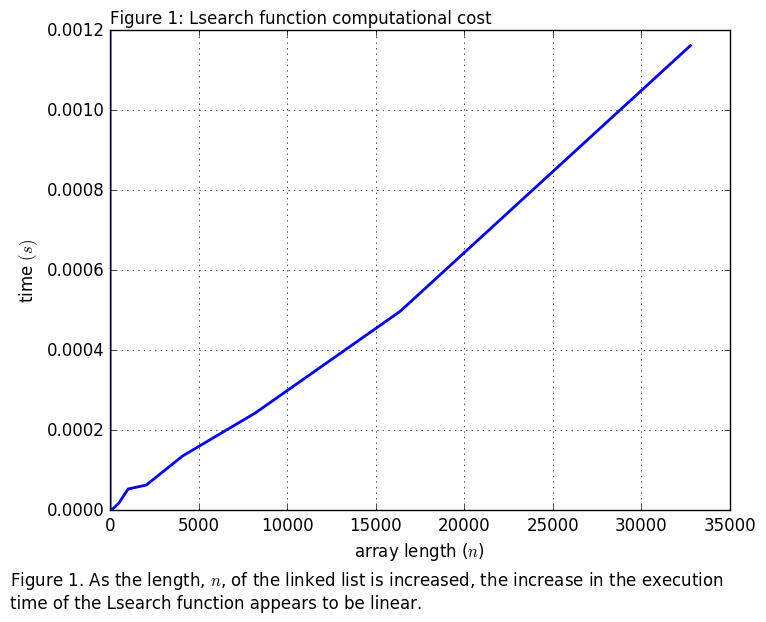

In [62]:
fig,ax=PyPlot.subplots(1,1)
txt="Figure 1. As the length, "L"$n$"", of the linked list is increased, the increase in the execution\ntime of the Lsearch function appears to be linear."
fig[:text](0,-0.06,txt,fontsize=12)
title("Figure 1: Lsearch function computational cost",fontsize=12,loc="left")
grid("on")
ax[:set_xlabel](L"array length ($n$)", fontsize=12)
ax[:set_ylabel](L"time $(s)$", fontsize=12)
x=linspace(1,15,15)
x2=(2.0).^x
plot(x2,time_lsearch,lw=2,label="Actual")
ylim(0,0.0012);

## Question 2: Interval membership


**2.1)** Use Julia's random number generator to generate $n$ random interval lengths, $y_1, y_2, \ldots, y_n$ between 0 and 1 as shown: 

In [6]:
# Set number of intervals
n=10

# Seed for random number generator. 
# You should choose your own seed so that everyone does not end up with the same random sequences
seed = 1111 

# Initialise the random number generator
rng = MersenneTwister(seed)

# Generate a sample of n uniform random numbers in the interval [0,1]
X = rand(rng, n) 
print("10 random interval lengths are: ", X)

10 random interval lengths are: [0.470171,0.19116,0.235326,0.949497,0.584869,0.711075,0.282443,0.652569,0.566602,0.582562]

Using the objects defined in KVPair.jl and LList.jl, create an array of key-value pairs, $(i, x_i)$, associating each interval with the corresponding partial sum and store this array in a linked list. Print the list for a small value of $n$to verify that it works.

In [30]:
# Using the llistpartialsum function to create the linked list 
L,lenth=llistpartialsum(10,1111)

print("L is an llist of 10 KVPairs that associate each interval with the corresponding partial sum:\n\n",L)

L is an llist of 10 KVPairs that associate each interval with the corresponding partial sum:

Nullable{LList}(LList(KVPair(1,0.470171),LList(KVPair(2,0.661331),LList(KVPair(3,0.896657),LList(KVPair(4,1.84615),LList(KVPair(5,2.43102),LList(KVPair(6,3.1421),LList(KVPair(7,3.42454),LList(KVPair(8,4.07711),LList(KVPair(9,4.64371),LList(KVPair(10,5.22627),#NULL)))))))))))

**2.2)** Modify the search function you wrote above to write a recursive function that takes the LList containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as inputs and returns the KVPair corresponding to the interval in which $x$ lies. Verify that it works for small values of $n$ and use Julia's @timed macro to measure how the typical computational cost grows with $n$. 

The recursive search function I wrote is called: **intervalmembership()**.

In [32]:
# Verifying intervalmembership function works for n=10

L,lenth=llistpartialsum(10,1111)
k=rand(Uniform(0,lenth))
print("A random float64 in the range [0,",lenth,"] is ",k,", and the KVPair corresponding to the interval in which it lies is: ",intervalmembership(L,k),".")

A random float64 in the range [0,5.226273880451505] is 4.367611602873561, and the KVPair corresponding to the interval in which it lies is: (9,4.643712196043175).

In [3]:
# Measuring the search speed of the interval membership function

seed=1111
time_linear=zeros(15)

for i=1:15
    n=2^i
    L,x=llistpartialsum(n,seed)
    t=@timed intervalmembership(L,x)
    time_linear[i]=t[2]
end    

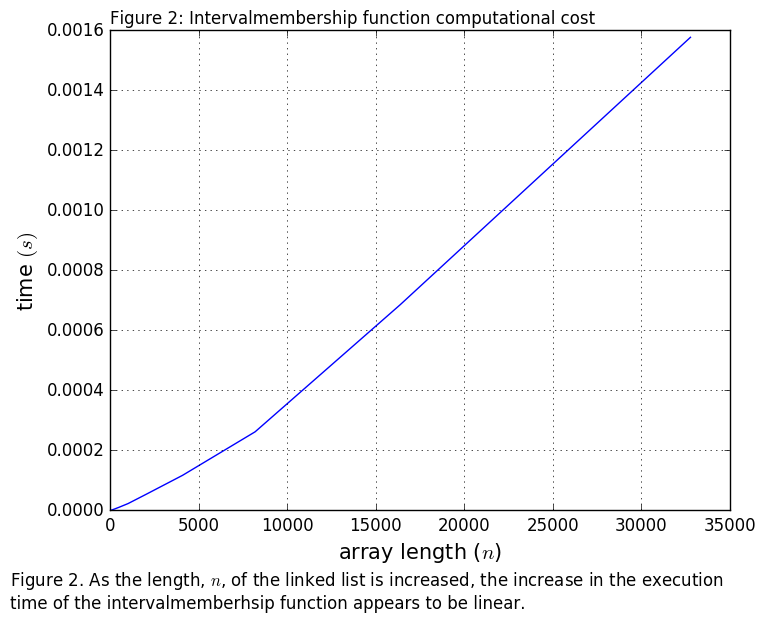

In [56]:
fig,ax=PyPlot.subplots(1,1)
txt="Figure 2. As the length, "L"$n$"", of the linked list is increased, the increase in the execution
time of the intervalmemberhsip function appears to be linear."
fig[:text](0,-0.06,txt,fontsize=12)
title("Figure 2: Intervalmembership function computational cost",fontsize=12,loc="left");
grid("on")
ax[:set_xlabel](L"array length ($n$)",fontsize=15) 
ax[:set_ylabel](L"time $(s)$", fontsize=15);
x=linspace(1,15,15)
x2=(2.0).^x
plot(x2,time_linear);

**2.3)** Write a recursive function that takes the FTree containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as 
inputs and returns the KVPair corresponding to the interval in which $x$ lies. Verify that it works for small values of $n$ and use Julia's @timed macro to compare how the typical computational compares to the above linear search version. Note it can sometimes be difficult to directly measure $O(\log\, n)$ growth in computation time since the problem size needs to become very large to register appreciable run times.

The recursive function I wrote is called: **treesearch()**.

In [8]:
n=5
seed=1111
rng=MersenneTwister(seed)
X=rand(rng,n)
# Now calculate the array of partial sums
values = Array{KVPair}(n)
xs=zeros(n,2)
for i=1:n
    x=sum(X[1:i])
    xs[i,1]=i
    xs[i,2]=x
    values[i]=KVPair(i,X[i])
end
T=Nullable{FTree}(FTree(KVPair(0,0.0)))
T=buildFTree(T,values);

In [9]:
k=rand(Uniform(0,sum(X)))
print("A random number contained within the entire intervals is, ",k
    ,", and the corresponding KVPair\nfound using the treesearch function is: ",treesearch(T,k),".")

A random number contained within the entire intervals is, 1.9173930951258728, and the corresponding KVPair
found using the treesearch function is: (4,0.9494974401615515).

In [39]:
N=20
seed=1111
rng=MersenneTwister(seed)
time_actual=zeros(N)
time_theory=zeros(N)

for i=1:N
    n=2^i
    values=Array{KVPair}(n)
    X=rand(rng,n)
    for j in 1:n
        values[j]=KVPair(j,X[j])
    end
    T=Nullable{FTree}(FTree(KVPair(0,0.0)))
    T=buildFTree(T,values)
    k=sum(X)
    t=@timed treesearch(T,k)
    time_actual[i]=t[2]
    #time_theory[i]=log(n)*time_actual[1]
end    

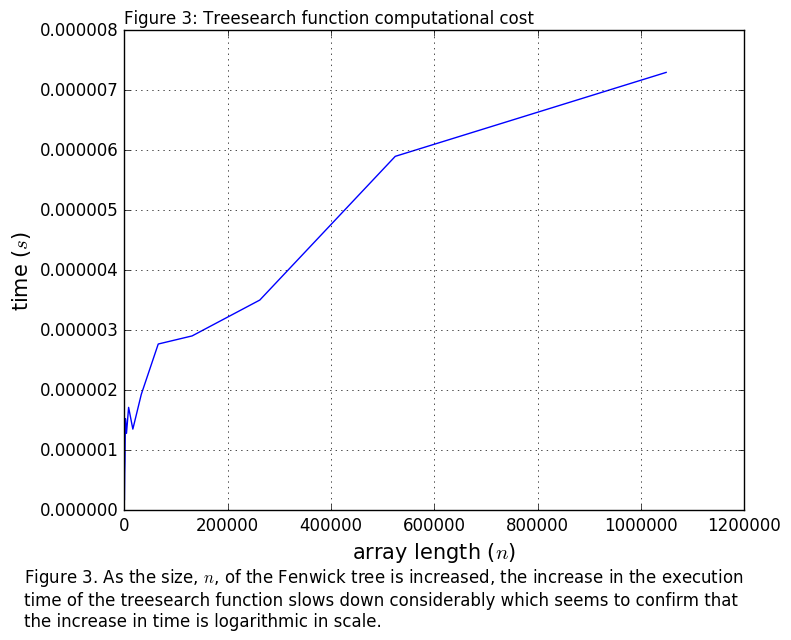

In [65]:
fig,ax=PyPlot.subplots(1,1)
txt="Figure 3. As the size, "L"$n$"", of the Fenwick tree is increased, the increase in the execution
time of the treesearch function slows down considerably which seems to confirm that
the increase in time is logarithmic in scale."
fig[:text](0,-0.09,txt,fontsize=12)
title("Figure 3: Treesearch function computational cost",fontsize=12,loc="left");
grid("on")
ax[:set_xlabel](L"array length ($n$)",fontsize=15)
ax[:set_ylabel](L"time ($s$)", fontsize=15);
x=linspace(1,N,N)
x2=2.^x
plot(x2,time_actual);

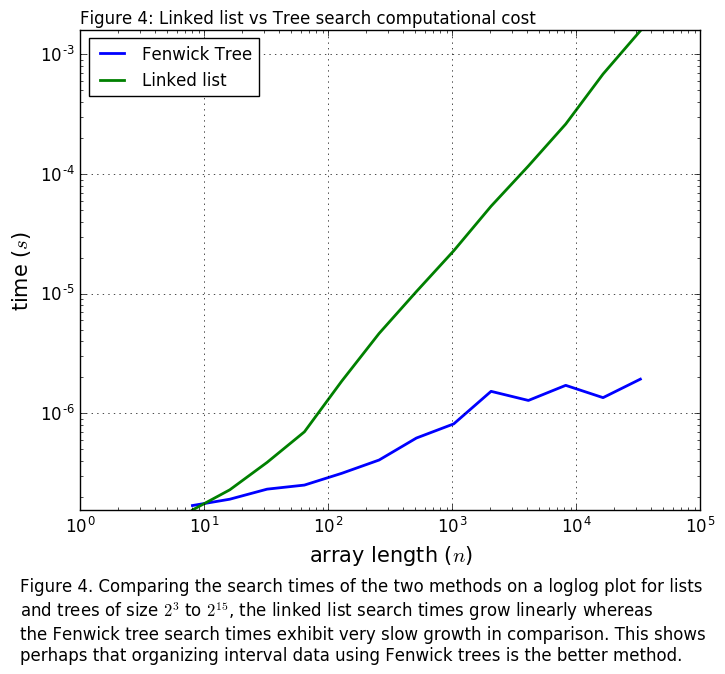

In [53]:
fig,ax=PyPlot.subplots(1,1)
txt=L"Figure 4. Comparing the search times of the two methods on a loglog plot for lists 
and trees of size $2^3$ to $2^{15}$, the linked list search times grow linearly whereas 
the Fenwick tree search times exhibit very slow growth in comparison. This shows 
perhaps that organizing interval data using Fenwick trees is the better method."
fig[:text](0.05,-0.15,txt,fontsize=12)
title("Figure 4: Linked list vs Tree search computational cost ",fontsize=12,loc="left")
grid("on")
ax[:set_xlabel](L"array length ($n$)",fontsize=15)
ax[:set_ylabel](L"time ($s$)", fontsize=15)
loglog(x2[3:15],time_actual[3:15],label="Fenwick Tree",lw=2)
loglog(x2[3:15],time_linear[3:15],label="Linked list",lw=2)
ylim(-0.0001,0.0016)
legend(loc=2,fontsize=12);

## Question 3: Gillespie algorithm for heterogeneous diffusion

The following piece of code implements the Gillespie algorithm for N=100, L=10, $\Delta x = 0.1$ and $D=1$, converts the particle positions to particle density and compares to the solution of the diffusion equation on an unbounded domain at t=1 (we assume that L=10 is far enough from zero to be considered unbounded):

$$c(x, t) = \frac{1}{\sqrt{2 \pi D t}}\, \exp [-\frac{1}{2}\frac{x^2}{D t} ]$$

In [73]:
# Original codes were moved into the functions normal and getdensity found in functions2.jl

N=100
D=1.0
T=1.0
P,X=getdensity(N)
P1=normal(N,D,T);

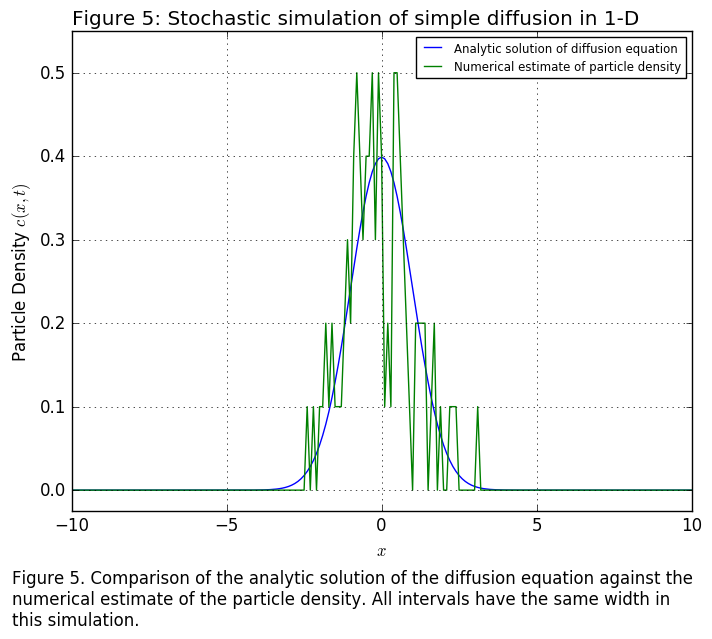

In [76]:
fig,ax=PyPlot.subplots(1,1)
txt="Figure 5. Comparison of the analytic solution of the diffusion equation against the
numerical estimate of the particle density. All intervals have the same width in
this simulation."
fig[:text](0.05,-0.09,txt,fontsize=12)
plot(X, P1, label="Analytic solution of diffusion equation")
plot(X, P, label="Numerical estimate of particle density")
legend(fontsize=8.5)
title("Figure 5: Stochastic simulation of simple diffusion in 1-D",loc="left")
ax[:set_ylabel](L"Particle Density $c(x,t)$", fontsize=12)
ax[:set_xlabel](L"$x$", fontsize=12)
ylim(-0.025,maximum(P)+0.05)
grid("on");

**3.1)** The code above makes critical use of the fact that all intervals have the same width in order to decide which particle to move at each step. Suppose now that instead of being equal to $D$ for each particle, the diffusion coefficients are drawn from an exponential distribution with mean $D$:

$$ P(x) = \frac{1}{D} \exp\left(-\frac{x}{D}\right). $$

Modify the code to account for this, using your code from Q2 above to solve the interval membership problem using linear search. You will need to use Julia's randexp() function to generate values for the diffusion coefficients. What is the largest value of $N$ you can simulate in a "reasonable" time?

Interval membership is found by a linear search using the function: **listsearch()**.

Particle density with exponentially distributed diffusion coefficients is obtained using the function: **getdensity_list()**.

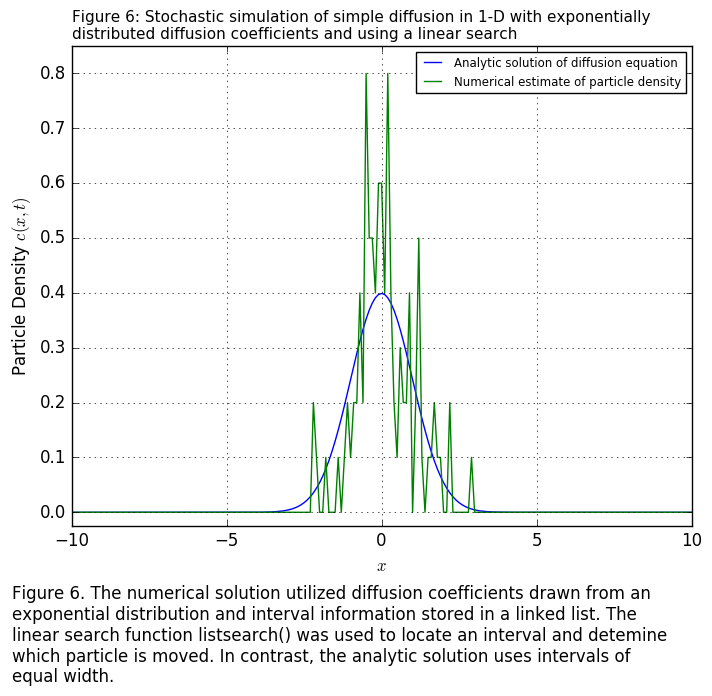

In [86]:
# See codes for getdensity_list and listsearch in functions2.jl

P_list,X=getdensity_list(100)
fig,ax=PyPlot.subplots(1,1)
txt="Figure 6. The numerical solution utilized diffusion coefficients drawn from an 
exponential distribution and interval information stored in a linked list. The 
linear search function listsearch() was used to locate an interval and detemine 
which particle is moved. In contrast, the analytic solution uses intervals of 
equal width."
fig[:text](0.05,-0.16,txt,fontsize=12)
plot(X, P1, label="Analytic solution of diffusion equation")
plot(X, P_list, label="Numerical estimate of particle density")
legend(fontsize=8.5)
title("Figure 6: Stochastic simulation of simple diffusion in 1-D with exponentially\ndistributed diffusion coefficients and using a linear search",loc="left",fontsize=11)
ax[:set_ylabel](L"Particle Density $c(x,t)$", fontsize=12)
ax[:set_xlabel](L"$x$", fontsize=12)
ylim(-0.025,maximum(P_list)+0.05)
grid("on");

In [88]:
m=1
time_list=zeros(m)
for i=1:m
    n=2^i
    t=@timed getdensity_list(n)
    time_list[i]=t[2]
end
;

In [93]:
time_list

11-element Array{Float64,1}:
    1.1518e-5  
    4.041e-6   
    1.0905e-5  
    2.8814e-5  
    0.000210066
    0.0026552  
    0.0403649  
    0.566889   
   10.6033     
  213.175      
 3457.78       

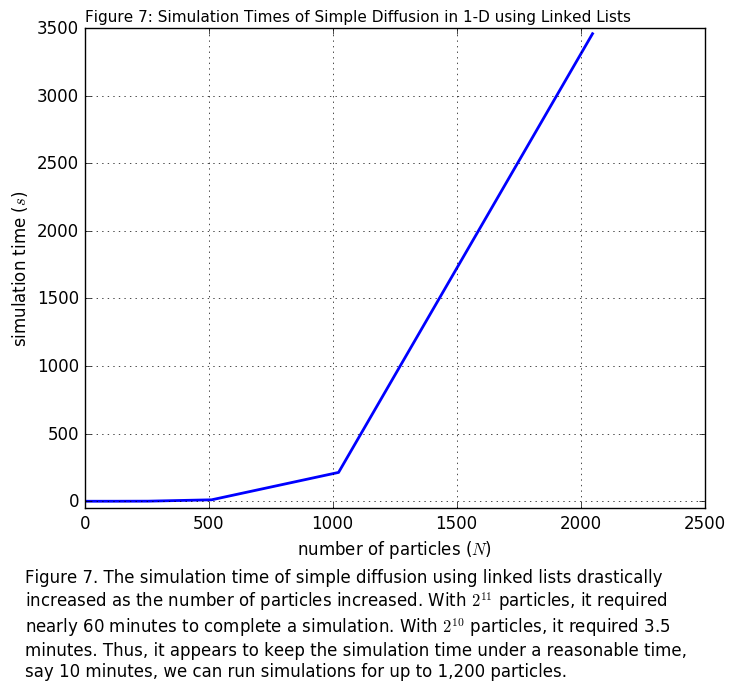

In [111]:
fig,ax=PyPlot.subplots(1,1)
txt=L"Figure 7. The simulation time of simple diffusion using linked lists drastically
increased as the number of particles increased. With $2^{11}$ particles, it required
nearly 60 minutes to complete a simulation. With $2^{10}$ particles, it required 3.5
minutes. Thus, it appears to keep the simulation time under a reasonable time, 
say 10 minutes, we can run simulations for up to 1,200 particles." 
fig[:text](0.05,-0.18,txt,fontsize=12)
title("Figure 7: Simulation Times of Simple Diffusion in 1-D using Linked Lists",loc="left",fontsize=11)
ax[:set_ylabel](L"simulation time ($s$)", fontsize=12)
ax[:set_xlabel](L"number of particles ($N$)", fontsize=12)
x=linspace(1,11,11)
x2=(2.0).^x
plot(x2,time_list,lw=2)
ylim(-50,3500)
grid("on");

**3.2)** Try again using your Fenwick tree from Q2 to solve the interval membership problem and compare. What is the largest value of $N$ you can simulate now?

Interval membership is found by the function: **treesearch()**.

Particle density with exponentially distributed diffusion coefficients is obtained using the function: **getdensity_tree()**.

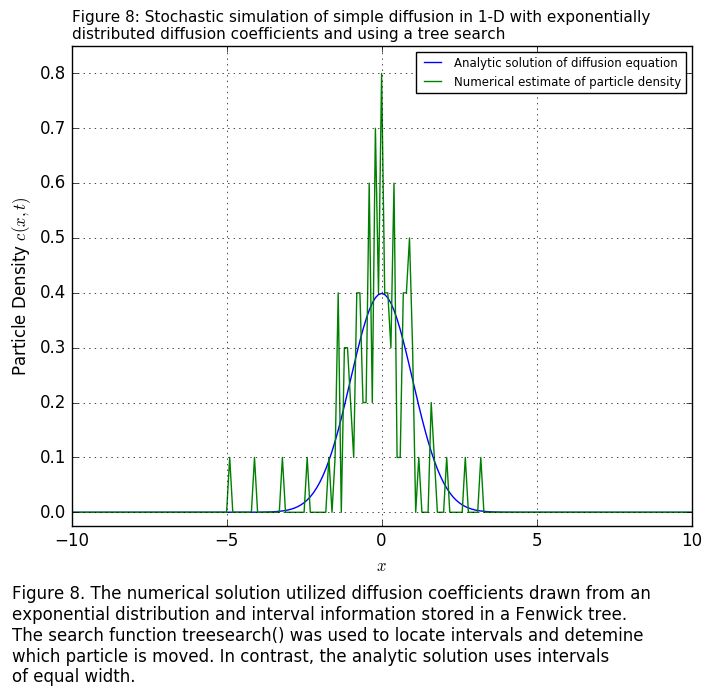

In [107]:
P_tree,X=getdensity_tree(100)
fig,ax=PyPlot.subplots(1,1)
txt="Figure 8. The numerical solution utilized diffusion coefficients drawn from an 
exponential distribution and interval information stored in a Fenwick tree. 
The search function treesearch() was used to locate intervals and detemine 
which particle is moved. In contrast, the analytic solution uses intervals
of equal width."
fig[:text](0.05,-0.16,txt,fontsize=12)
plot(X, P1, label="Analytic solution of diffusion equation")
plot(X, P_tree, label="Numerical estimate of particle density")
legend(fontsize=8.5)
title("Figure 8: Stochastic simulation of simple diffusion in 1-D with exponentially\ndistributed diffusion coefficients and using a tree search",loc="left",fontsize=11)
ax[:set_ylabel](L"Particle Density $c(x,t)$", fontsize=12)
ax[:set_xlabel](L"$x$", fontsize=12)
ylim(-0.025,maximum(P_tree)+0.05)
grid("on");

In [108]:
m=11
time_tree=zeros(m)
for i=1:m
    n=2^i
    t=@timed getdensity_tree(n)
    time_tree[i]=t[2]
end

In [115]:
for i=12
    n=2^i
    t=@timed getdensity_tree(n)
    time_tree=[time_tree;t[2]]
end

In [142]:
time_tree

12-element Array{Float64,1}:
   8.665e-6   
   4.227e-6   
   6.369e-6   
   1.6295e-5  
   8.4547e-5  
   0.000483517
   0.00437521 
   0.0594864  
   0.397586   
   4.03481    
  38.6178     
 434.219      

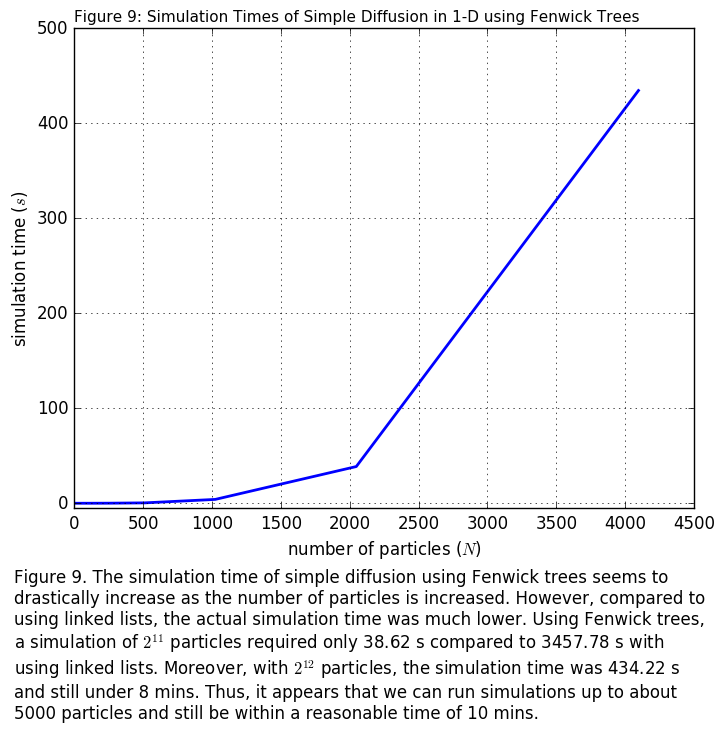

In [144]:
fig,ax=PyPlot.subplots(1,1)
txt=L"Figure 9. The simulation time of simple diffusion using Fenwick trees seems to 
drastically increase as the number of particles is increased. However, compared to 
using linked lists, the actual simulation time was much lower. Using Fenwick trees, 
a simulation of $2^{11}$ particles required only 38.62 s compared to 3457.78 s with 
using linked lists. Moreover, with $2^{12}$ particles, the simulation time was 434.22 s 
and still under 8 mins. Thus, it appears that we can run simulations up to about 
5000 particles and still be within a reasonable time of 10 mins." 
fig[:text](0.05,-0.25,txt,fontsize=12)
title("Figure 9: Simulation Times of Simple Diffusion in 1-D using Fenwick Trees",loc="left",fontsize=11)
ax[:set_ylabel](L"simulation time ($s$)", fontsize=12)
ax[:set_xlabel](L"number of particles ($N$)", fontsize=12)
x=linspace(1,12,12)
x2=(2.0).^x
plot(x2,time_tree,lw=2)
ylim(-5,500)
grid("on");

**3.3)** Show analytically that the solution of the heterogenous diffusion problem is

$$ c(x,t) = \frac{\exp \left(-\sqrt{\frac{2}{D\,t}}\, |x| \right)}{\sqrt{2\, D\, t}}$$

You will probably need the integral formula (Formula 3.325 of Gradshteyn and Rizhik, 7th Ed.)

$$ \int_0^\infty \exp\left(-a\,x^2 - \frac{b}{x^2} \right)\, dx =  \frac{1}{2}\,\sqrt{\frac{\pi}{a}}\,\exp\left(-2 \sqrt{a\,b} \right).$$
Use this formula to validate your numerical results.

 \begin{align}
  & \left\langle c(x,t) \right\rangle =\int_{0}^{\infty }{dy}(\frac{1}{D}{{e}^{\frac{-y}{D}}})(\frac{1}{\sqrt{2\pi yt}}{{e}^{-\frac{1}{2}\frac{{{x}^{2}}}{yt}}})=\frac{1}{D\sqrt{2\pi t}}\int_{0}^{\infty }{dy}(\frac{1}{\sqrt{y}}{{e}^{-\frac{y}{D}-\frac{1}{2}\frac{{{x}^{2}}}{yt}}}) \\ 
 & \text{let }u={{y}^{\frac{1}{2}}}\Rightarrow dy=2{{y}^{\frac{1}{2}}}du \\ 
 & \Rightarrow \left\langle c(x,t) \right\rangle =\frac{2}{D\sqrt{2\pi t}}\int_{0}^{\infty }{du}\text{ }{{e}^{-\frac{{{u}^{2}}}{D}-\frac{1}{2}\frac{{{x}^{2}}}{t{{u}^{2}}}}}) \\ 
 & =\frac{1}{\sqrt{2Dt}}{{e}^{-\sqrt{\frac{2{{x}^{2}}}{Dt}}}}\text{ by formula 3}\text{.325 of Gradshteyn and Rizhik} \\ 
 & \Rightarrow c(x,t)=\frac{1}{\sqrt{2Dt}}{{e}^{-\sqrt{\frac{2}{Dt}}\left| x \right|}} \\ 
\end{align}

In [140]:
P,X=getdensity_tree(100) # Obtain numerical density using Fenwick trees
Analytic=analyticdensity(X,1.0,1.0) # Obtain density from the analytic solution found above;

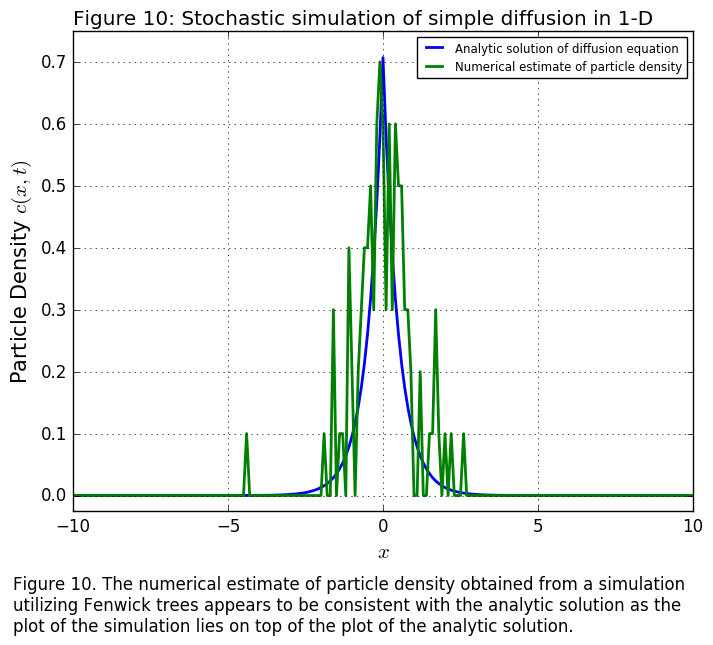

In [141]:
fig,ax=PyPlot.subplots(1,1)
txt="Figure 10. The numerical estimate of particle density obtained from a simulation
utilizing Fenwick trees appears to be consistent with the analytic solution as the 
plot of the simulation lies on top of the plot of the analytic solution." 
fig[:text](0.05,-0.10,txt,fontsize=12)
plot(X,Analytic,label="Analytic solution of diffusion equation",linewidth=2)
plot(X,P,label="Numerical estimate of particle density",lw=2)
legend(fontsize=8.5)
title("Figure 10: Stochastic simulation of simple diffusion in 1-D",loc="left")
ax[:set_ylabel](L"Particle Density $c(x,t)$", fontsize=15)
ax[:set_xlabel](L"$x$", fontsize=15)
ylim(-0.025,maximum(P)+0.05)
grid("on");